# url: https://note.com/sasayaka360/n/n353d043ef907

# 勾配ブースティング決定木：データで手に入れる最高の選択

機械学習の「勾配ブースティング決定木」についてChatGPTに教えてもらったのでメモ。我々がPDCA（Plan-Do-Check-Action）サイクルで行う修正・向上と似ている。

## 勾配ブースティング決定木
LightGBMやXGBoostなどで利用される「勾配ブースティング決定木（GBDT）」は、データから隠れた「法則」や「パターン」を見つける強力な手法です。この方法では、「勾配」と呼ばれる変化の度合いを用いて、決定木が逐次的に修正されます。

## 決定木とは？
決定木は、一連の質問に答える形でデータを分類または数値を予測します。質問応答形式で最終的な結論に到達する"20 Questions Game"に似ています。

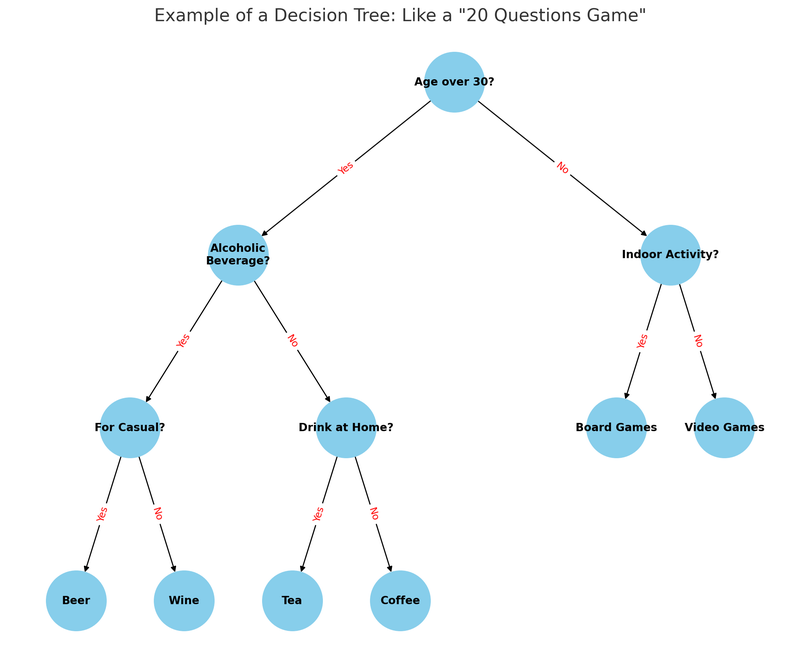

## 勾配ブースティングとは？
「勾配」とは誤差を修正する方向や修正の度合いを示す指標です。勾配ブースティングは、最初の決定木を基に、以下のステップで誤差を減らしていきます

    1. 最初の決定木で予測を行い、誤差を計算。
    2. この誤差を用いて、次の決定木を作成（勾配を考慮）。
    3. 新しい決定木を追加（ブースト）し、全体の予測精度を高める。



## 実際のデータでみてみよう
以下のグラフは、ダミーデータを使って、勾配ブースティング決定木がどのように動作するかを視覚的に示した例です。
「ブースト」を繰り返すことで予測値（赤い線）の精度が段階的に向上していくのがわかります。

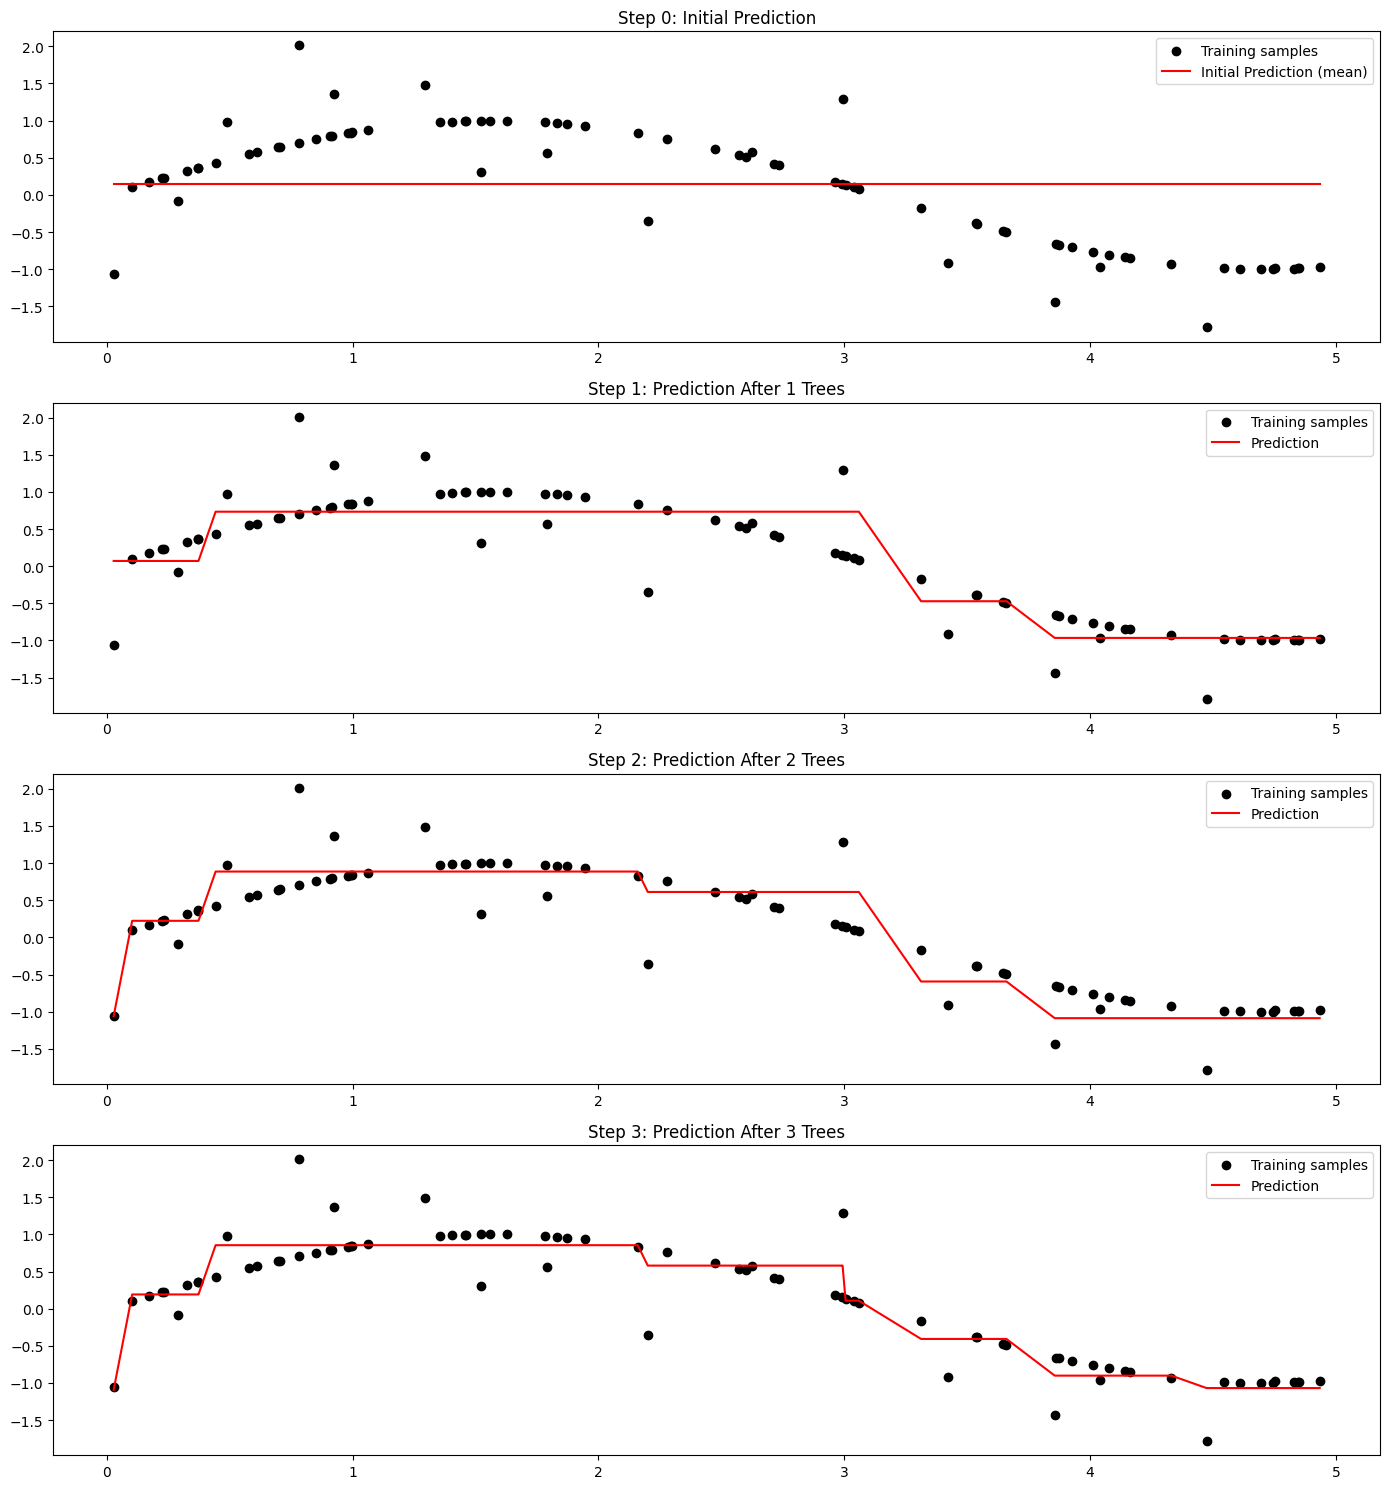

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor

# Generate synthetic data: y = x^2 + noise
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(16))

# Fit a gradient boosting model
n_estimators = 3  # We'll use 3 trees for this example
learning_rate = 1.0
gb_model = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=2, random_state=42)
gb_model.fit(X, y)

# Create some plots
plt.figure(figsize=(14, 5 * n_estimators))

# Initial prediction (just the mean)
initial_prediction = np.full(y.shape, np.mean(y))
plt.subplot(n_estimators + 1, 1, 1)
plt.scatter(X, y, c='k', label='Training samples')
plt.plot(X, initial_prediction, c='r', label='Initial Prediction (mean)')
plt.legend()
plt.title('Step 0: Initial Prediction')

# For each boosting iteration, create a plot
for i, stage in enumerate(gb_model.staged_predict(X)):
    plt.subplot(n_estimators + 1, 1, i + 2)
    plt.scatter(X, y, c='k', label='Training samples')
    plt.plot(X, stage, c='r', label='Prediction')
    plt.legend()
    plt.title(f'Step {i + 1}: Prediction After {i + 1} Trees')

plt.tight_layout()
plt.show()

このグラフを描画するためのPythonコードは以下のとおりで、Google Colabで実行可能です。
`n_estimators=3`はイテレーション回数といい、この例では3つの決定木を使用します。この数が多いほど、モデルは複雑なデータに適応しやすくなりますが、過学習（overfitting）のリスクも上がります。